In [ ]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format #set some option so that if there are float it will cut them to 2 digits
import matplotlib.pyplot as plt
import seaborn as sns #also for plotting

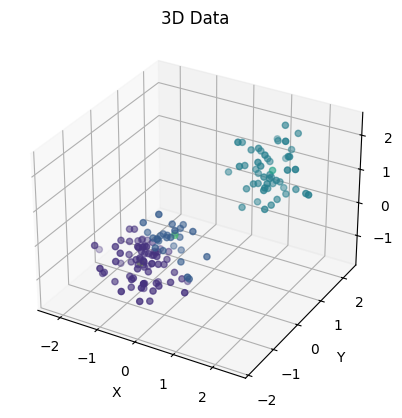

/home/gio_orna/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/gio_orna/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/gio_orna/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/gio_orna/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/gio_orna/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: User

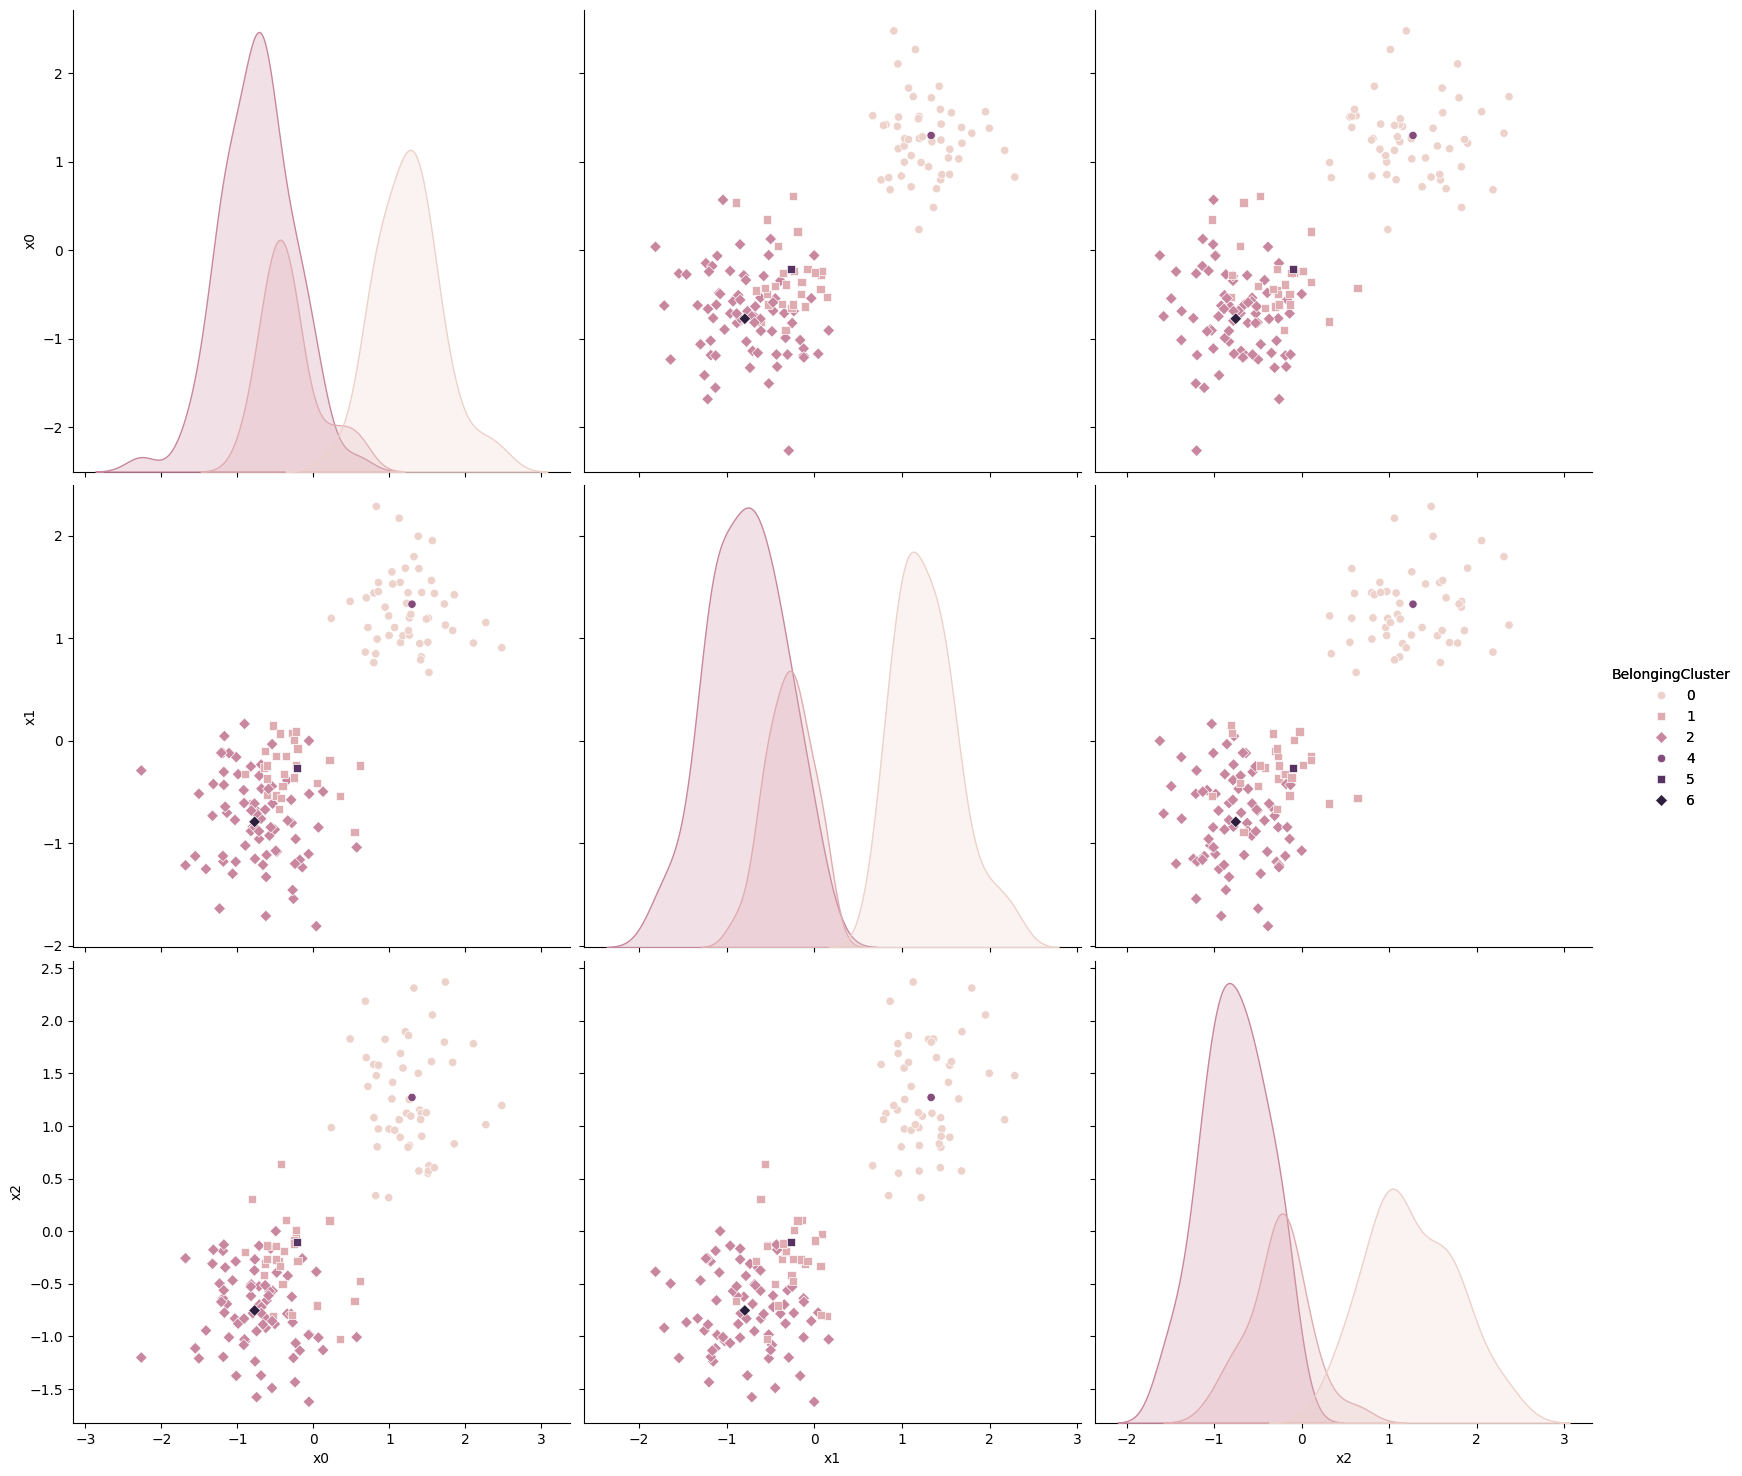

In [ ]:
#Grid of Scatterplot (for data points, maximum 3 variables per plot)
df = pd.read_csv('../src/output_cluster.csv') #read a csv file with a pandas command
#Read the centroids
try:
    centroids = pd.read_csv('../src/output_centroids.csv')
except FileNotFoundError:
    centroids = None


if(df.shape[1]==4):
    # 3D plot of data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    palette = sns.color_palette("viridis", df["BelongingCluster"].nunique())
    colors = df["BelongingCluster"].map(dict(zip(df["BelongingCluster"].unique(), palette)))
    ax.scatter(df["x0"], df["x1"], df["x2"], c=colors, s=20)
    if centroids is not None:
        ax.scatter(centroids["x0"], centroids["x1"], centroids["x2"], c='red', s=200, marker='X', label='Centroids')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('3D Data')
    plt.show()

vars_to_plot = df.columns.drop('BelongingCluster')
sns.pairplot(df, x_vars=vars_to_plot, y_vars=vars_to_plot, hue="BelongingCluster", height=5, markers=["o", "s", "D"]).add_legend() #with the same variables the scatterplot doesn't make sense do it plots the kde
